<a href="https://colab.research.google.com/github/ash0023/DS_ML_Proj_portfolio/blob/main/IMG_Classification_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
img=cv2.imread("/beauty-2013-06-emma-stone-baking-soda-skincare-secret-main.jpg")
img.shape

(1675, 1500, 3)

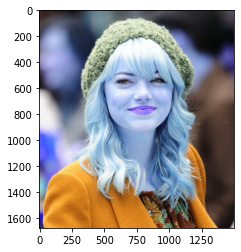

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1675, 1500)

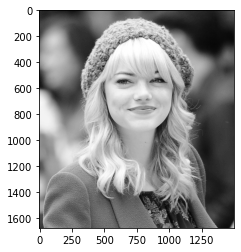

In [ ]:
plt.imshow(gray,cmap= 'gray')

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')  ##Face detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')          ##Eye detection

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[432, 252, 720, 720]], dtype=int32)

In [ ]:
(x,y,w,h)=faces[0]
x,y,w,h

(432, 252, 720, 720)

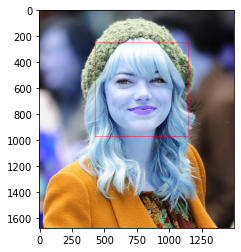

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) ##in bracket (255,0,0) is the color code
plt.imshow(face_img)

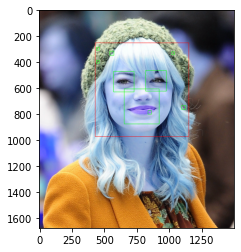

In [ ]:
cv2.destroyAllWindows() ##for eyes
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

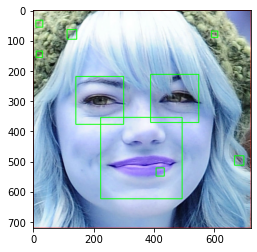

In [ ]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [ ]:
#function to directly crop the face part of the image
def get_cropped_image_if_2_eyes(image_path):
  img=cv2.imread(image_path)
  gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #The function converts an input image from one color space to another. 
  faces= face_cascade.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    roi_gray = gray[y:y:h, x:x+w]
    roi_color= img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) <= 2:## sign should be diiferent
      return roi_color

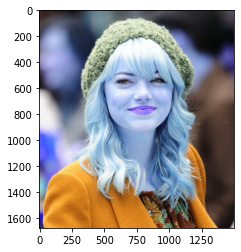

In [ ]:
original_image = cv2.imread('/beauty-2013-06-emma-stone-baking-soda-skincare-secret-main.jpg')
plt.imshow(original_image)

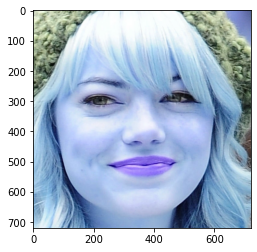

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/beauty-2013-06-emma-stone-baking-soda-skincare-secret-main.jpg')
plt.imshow(cropped_image)

In [ ]:
path_to_data='C:\Users\Shourya Dubey\Desktop\sports Personal\Celebs'
path_to_cr_data='C:\Users\Shourya Dubey\Desktop\sports Personal\Celebs'

SyntaxError: ignored

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

[]

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    